<a href="https://colab.research.google.com/github/annisaeka123/Machine_Learning-Semester5/blob/main/JS04_KUIS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [41]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [42]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [43]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [44]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
# Data Size
df.shape

(48842, 15)

In [46]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [47]:
df.shape

(48842, 15)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [49]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Jumlah data yang hilang:
- workclass : 963 data
- occupation : 966 data
- native-country : 274

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [77]:
df['workclass']      = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']     = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])


In [78]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

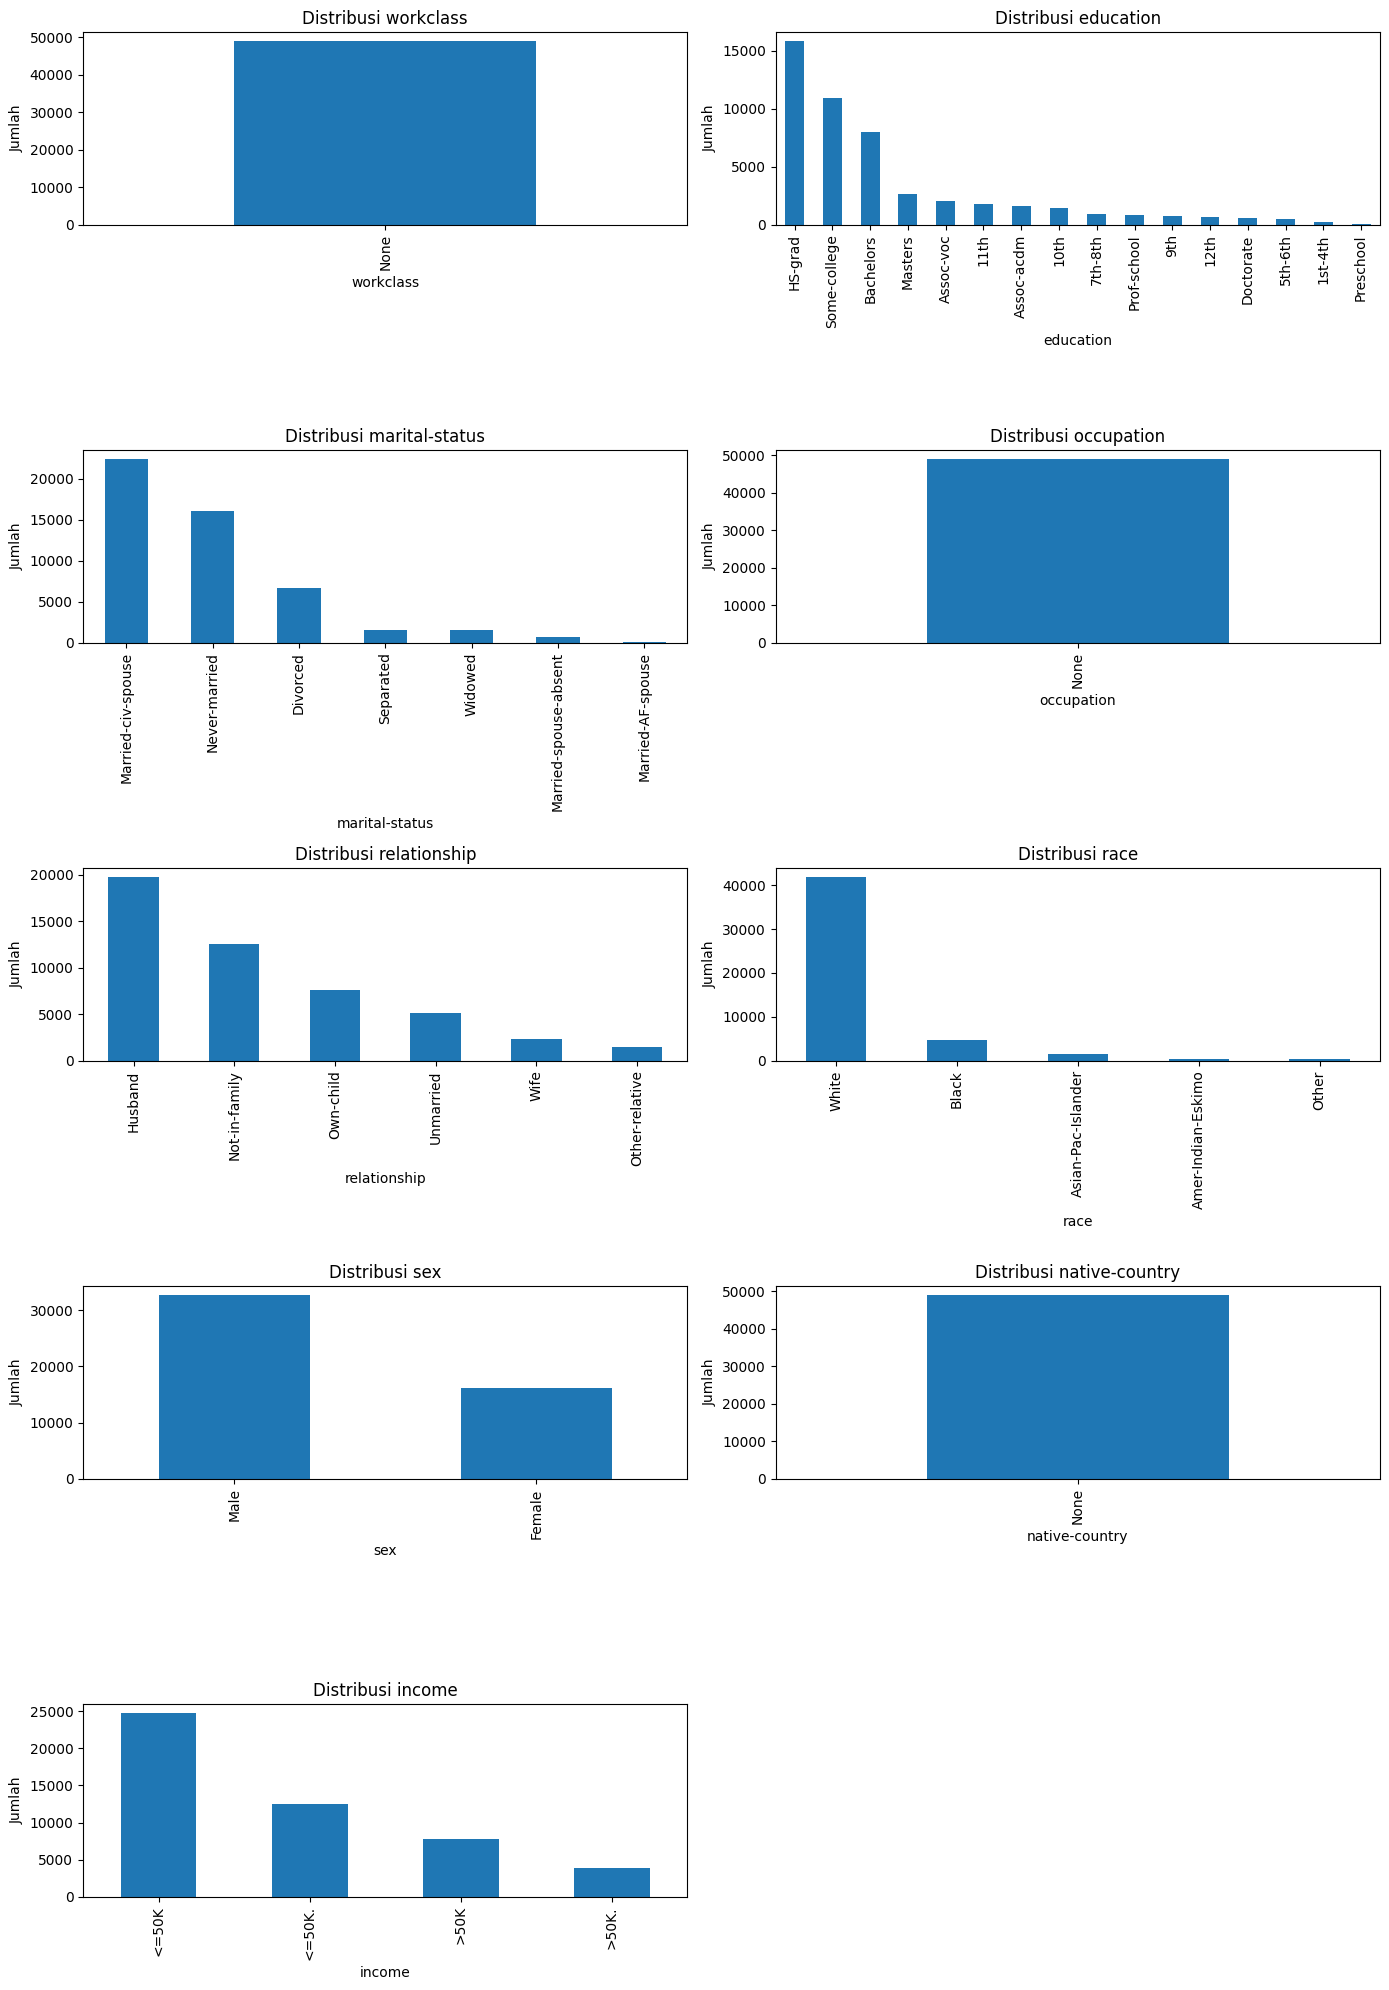

In [51]:
cat_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(5, 2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

# Matikan axis yang tidak terpakai
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

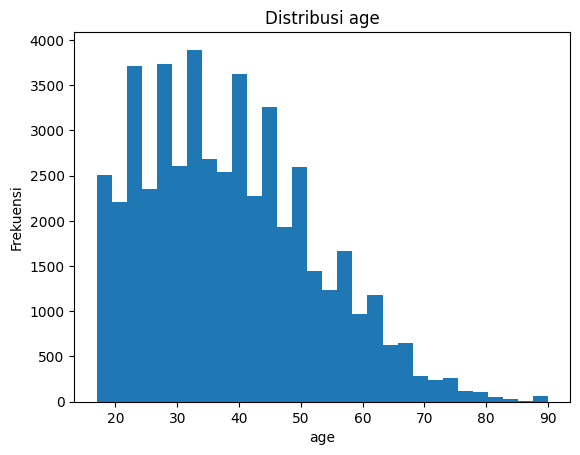

In [52]:
# Jawab 1.1 - Histrogram
num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

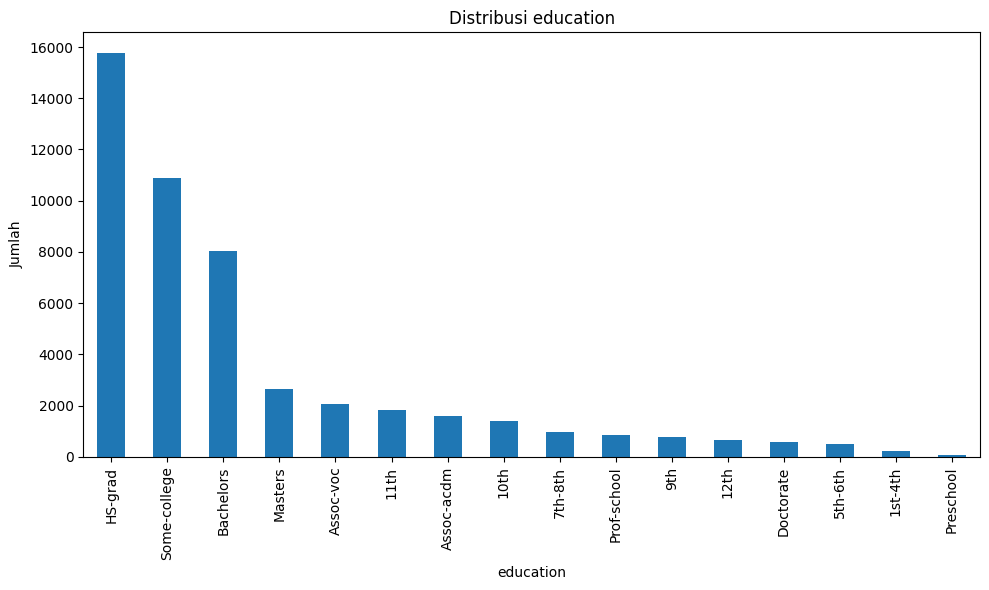

In [53]:
# Jawab 1.2 - Barchart
cat_cols = ['education']

fig, axes = plt.subplots(figsize=(10, 6))

for col in cat_cols:
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes)
    axes.set_title(f'Distribusi {col}')
    axes.set_xlabel(col)
    axes.set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

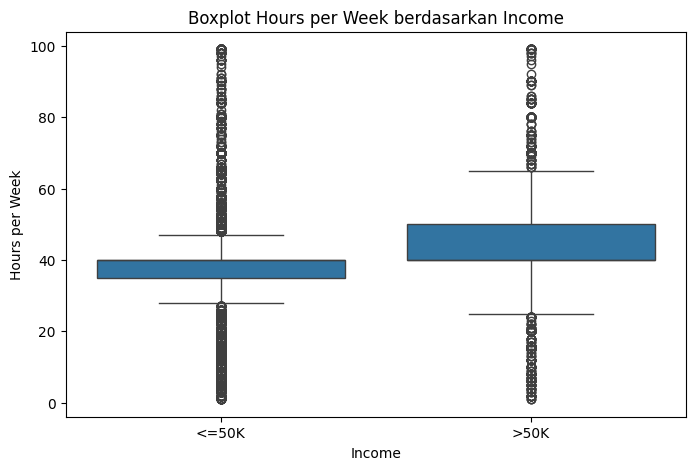

In [68]:
# Jawab 1.3 - Boxplot
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Boxplot Hours per Week berdasarkan Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

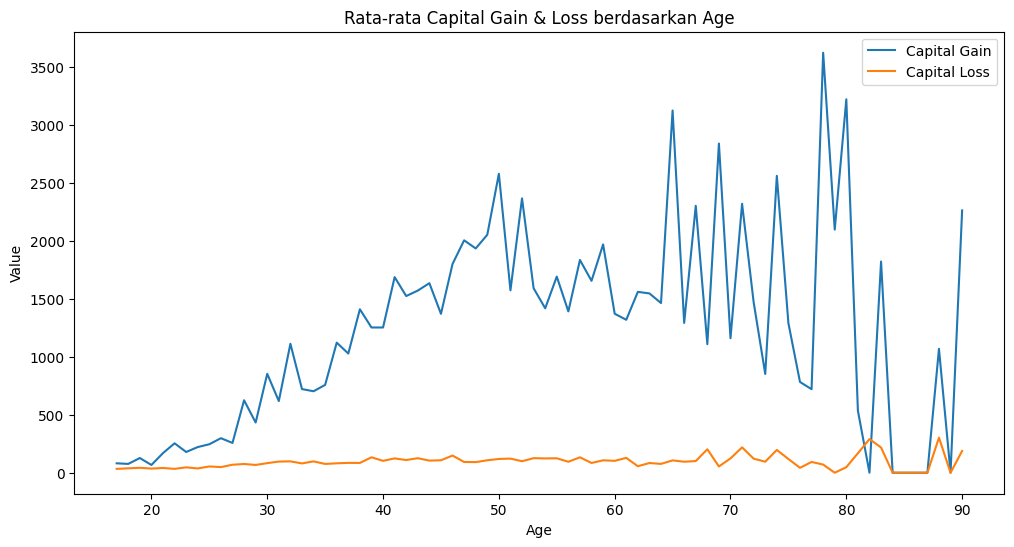

In [79]:
# Jawab 1.4 - Lineplot
age_grouped = df.groupby("age")[["capital-gain", "capital-loss"]].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_grouped, x="age", y="capital-gain", label="Capital Gain")
sns.lineplot(data=age_grouped, x="age", y="capital-loss", label="Capital Loss")

plt.title("Rata-rata Capital Gain & Loss berdasarkan Age")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [56]:
'''
Analisis Visual data Age:

1. Capital Gain:
   - Nilainya meningkat cukup tajam mulai usia 30 tahun ke atas.
   - Fluktuasi semakin tinggi di usia 40–70 tahun.
   - Pada usia lanjut (70–80 tahun) terlihat spike (lonjakan) yang ekstrem.
   - Polanya menunjukkan adanya kelompok kecil dengan nilai gain sangat besar.

2. Capital Loss:
   - Nilainya relatif rendah dan stabil di semua usia.
   - Tidak ada lonjakan setinggi capital gain, hanya fluktuasi kecil.
   - Artinya kerugian modal tidak terlalu dipengaruhi oleh usia,
     berbeda dengan capital gain.

3. Fenomena Umum:
   - Distribusi tidak merata, banyak outlier terutama pada capital gain.
   - Variasi terbesar terlihat pada capital gain di usia produktif dan lanjut.
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [83]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,Unknown,77516,Bachelors,13,Never-married,Unknown,Not-in-family,White,1,2174,0,40,Unknown,0
1,50,Unknown,83311,Bachelors,13,Married-civ-spouse,Unknown,Husband,White,1,0,0,13,Unknown,0
2,38,Unknown,215646,HS-grad,9,Divorced,Unknown,Not-in-family,White,1,0,0,40,Unknown,0
3,53,Unknown,234721,11th,7,Married-civ-spouse,Unknown,Husband,Black,1,0,0,40,Unknown,0
4,28,Unknown,338409,Bachelors,13,Married-civ-spouse,Unknown,Wife,Black,0,0,0,40,Unknown,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

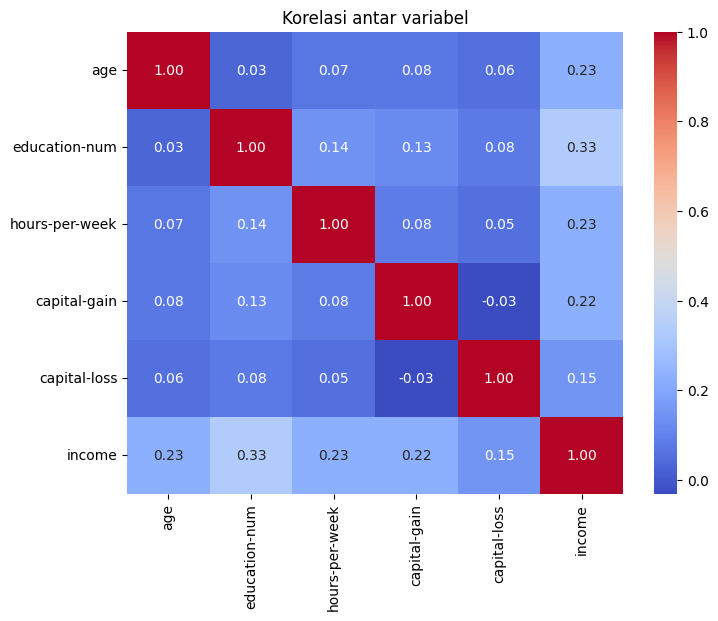

In [84]:
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()

In [59]:
'''
Hasil Analisis Korelasi:

1. Age memiliki korelasi positif moderat dengan income.
   Artinya, semakin tua usia seseorang, cenderung memiliki penghasilan lebih tinggi.

2. Education-num menunjukkan korelasi positif cukup kuat dengan income.
   Semakin tinggi tingkat pendidikan, semakin besar kemungkinan berpenghasilan >50K.

3. Hours-per-week berkorelasi positif dengan income, walaupun tidak terlalu kuat.
   Orang yang bekerja lebih lama per minggu cenderung berpeluang memiliki income lebih tinggi.

4. Capital-gain memiliki korelasi paling kuat dengan income.
   Hal ini logis, karena orang dengan capital-gain besar hampir pasti masuk kategori >50K.

5. Capital-loss juga berkorelasi dengan income, tapi relatif lebih lemah dibanding capital-gain.

Kesimpulan:
Variabel yang paling berpengaruh terhadap income adalah capital-gain,
diikuti oleh education-num dan age.
'''


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [85]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


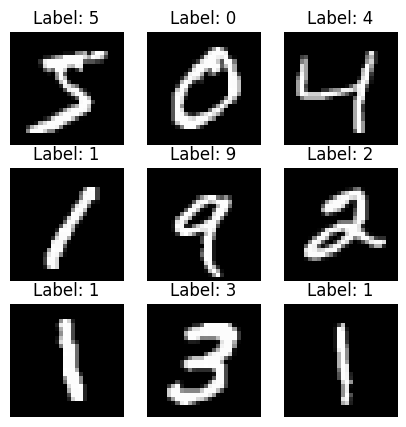

In [86]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape setelah upsampling: (10000, 32, 32)


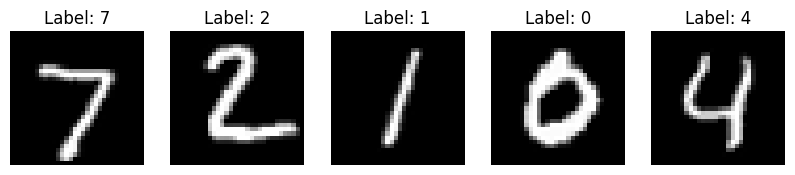

In [89]:
import cv2

# array kosong
X_test_up = np.zeros((X_test.shape[0], 32, 32))

for i in range(len(X_test)):
    X_test_up[i] = cv2.resize(X_test[i], (32,32), interpolation=cv2.INTER_CUBIC)

print("Ukuran data setelah upsampling:", X_test_up.shape)

# tampilkan 5 contoh data
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_up[i], cmap="gray")
    plt.title(y_test[i])
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [90]:
# normalisasi ke 0-1
X_test_norm = X_test_up / 255.0

print("Sebelum normalisasi:", X_test_up[0, :2, :2])
print("Sesudah normalisasi:", X_test_norm[0, :2, :2])

# cek range nilai
print("Min:", X_test_norm.min(), "Max:", X_test_norm.max())

Sebelum normalisasi: [[0. 0.]
 [0. 0.]]
Sesudah normalisasi: [[0. 0.]
 [0. 0.]]
Min: 0.0 Max: 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [92]:
# array kosong
X_test_flat = np.zeros((X_test_norm.shape[0], 32*32))

for i in range(X_test_norm.shape[0]):
    X_test_flat[i] = X_test_norm[i].flatten()

print("Shape sebelum flatten :", X_test_norm.shape)   # (10000, 32, 32)
print("Shape setelah flatten :", X_test_flat.shape)   # (10000, 1024)

# cek 1 sampel
print("Contoh data flatten (5 nilai pertama):", X_test_flat[0][:5])


Shape sebelum flatten : (10000, 32, 32)
Shape setelah flatten : (10000, 1024)
Contoh data flatten (5 nilai pertama): [0. 0. 0. 0. 0.]
